In [1]:
%matplotlib inline

from time import sleep
import random

import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

In [2]:
nactions =  2
nparams = 4
learning_rate = 0.05
gamma = .3

beta = 0.9
nepisode = 50

nbatch = 100
batch_legth = 512
batch_iter = 100


In [3]:

_input = tf.placeholder(shape=[1, 4], dtype=tf.float32)

# w0 = tf.Variable(tf.random_uniform([4, 4], -0.01, 0.01))
# b0 = tf.Variable(tf.random_uniform([1, 4], -0.01, 0.01))
# # z0 = tf.multiply(_input, w0)
# z0 = tf.add(tf.matmul(_input, w0), b0)
# i0 = tf.nn.softmax(z0)

# Hidden layer 1
w1 = tf.Variable(tf.random_uniform([4, 16], -0.01, 0.01))
b1 = tf.Variable(tf.random_uniform([1, 16], -0.01, 0.01))
z1 = tf.add(tf.matmul(_input, w1), b1)
h1 = tf.tanh(z1)

w2 = tf.Variable(tf.random_uniform([16, 2], -0.01, 0.01))
b2 = tf.Variable(tf.random_uniform([1, 2], -0.01, 0.01))
z2 = tf.add(tf.matmul(h1, w2), b2)
Q = tf.nn.softmax(z2)

# w1 = tf.Variable(tf.zeros([4, 16]))
# b1 = tf.Variable(tf.zeros([1, 16]))
# z1 = tf.add(tf.matmul(_input, w1), b1)
# h1 = tf.tanh(z1)

# w2 = tf.Variable(tf.zeros([16, 2]))
# b2 = tf.Variable(tf.zeros([1, 2]))
# z2 = tf.add(tf.matmul(h1, w2), b2)
# Q = tf.nn.softmax(z2)

Qa = tf.argmax(Q, 1)

Qe = tf.placeholder(shape=[1, nactions], dtype=tf.float32)
error = tf.reduce_sum(tf.square(Qe - Q))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)


[ 0.00369982  0.04696016  0.0131024   0.01949356]
[1] [[ 0.49997908  0.50002092]]
[1] [[ 0.49997324  0.50002676]]
[1] [[ 0.49997932  0.50002068]]
[1] [[ 0.49998486  0.50001514]]
[1] [[ 0.49997854  0.50002152]]
[1] [[ 0.49998415  0.50001591]]
[1] [[ 0.49998924  0.50001073]]
[1] [[ 0.49999398  0.50000602]]
[1] [[ 0.49999833  0.50000167]]
[0] [[ 0.50000238  0.49999765]]
[0] [[ 0.50000614  0.49999383]]
[0] [[ 0.50000972  0.49999034]]
[0] [[ 0.50001305  0.49998698]]
[0] [[ 0.50000501  0.49999499]]

[-0.04356598 -0.01367969 -0.01364786  0.00518376]
[1] [[ 0.00745697  0.99254298]]
[1] [[ 0.00743878  0.99256116]]
[1] [[ 0.00745724  0.99254274]]
[1] [[ 0.00747577  0.99252421]]
[1] [[ 0.00749445  0.99250549]]
[1] [[ 0.00751334  0.9924866 ]]
[1] [[ 0.00753252  0.99246746]]
[1] [[ 0.00755205  0.99244797]]
[1] [[ 0.00757199  0.992428  ]]
[1] [[ 0.00759236  0.99240762]]
[1] [[ 0.00761319  0.99238682]]

[-0.02669667 -0.01573707 -0.0057179   0.04805036]
[1] [[ 0.00734249  0.99265748]]
[1] [[ 0.007350


[-0.02968951  0.04609563 -0.02108448 -0.02464515]
[0] [[  1.00000000e+00   7.02592651e-09]]
[0] [[ 0.94407725  0.05592268]]
[1] [[  1.11647421e-06   9.99998927e-01]]
[0] [[ 0.96401346  0.03598658]]
[1] [[  1.36285939e-06   9.99998689e-01]]
[0] [[ 0.96469206  0.03530795]]
[1] [[  1.15401167e-06   9.99998808e-01]]
[0] [[ 0.94744563  0.05255438]]
[1] [[  6.81455788e-07   9.99999285e-01]]
[0] [[ 0.88441646  0.11558356]]
[1] [[  2.82654980e-07   9.99999762e-01]]
[0] [[ 0.6727519  0.3272481]]
[1] [[  8.32898053e-08   9.99999881e-01]]
[1] [[ 0.25469926  0.74530071]]
[0] [[  9.99999642e-01   3.57049430e-07]]
[1] [[ 0.03514079  0.96485925]]
[0] [[  9.99997020e-01   2.97632801e-06]]
[1] [[ 0.0031526   0.99684733]]
[0] [[  9.99964952e-01   3.50908194e-05]]
[1] [[  2.19479902e-04   9.99780476e-01]]
[0] [[  9.99371946e-01   6.28069509e-04]]
[1] [[  1.21472967e-05   9.99987841e-01]]
[0] [[ 0.98203123  0.01796881]]
[1] [[  5.47377226e-07   9.99999404e-01]]
[0] [[ 0.52357244  0.47642756]]
[1] [[  2.1

[0] [[  9.99626756e-01   3.73280171e-04]]
[1] [[  4.67775506e-04   9.99532223e-01]]
[0] [[  9.99998689e-01   1.31808224e-06]]
[1] [[ 0.42814332  0.57185668]]

[ 0.03857656  0.01736306  0.03284873  0.02221444]
[1] [[  2.54918665e-14   1.00000000e+00]]
[1] [[  2.57731289e-14   1.00000000e+00]]
[1] [[  2.60030289e-14   1.00000000e+00]]
[1] [[  2.61920324e-14   1.00000000e+00]]
[1] [[  2.63479119e-14   1.00000000e+00]]
[1] [[  2.64763729e-14   1.00000000e+00]]
[1] [[  2.65820267e-14   1.00000000e+00]]
[1] [[  2.66685613e-14   1.00000000e+00]]
[1] [[  2.67391564e-14   1.00000000e+00]]
[1] [[  2.67963887e-14   1.00000000e+00]]

[-0.01881265 -0.01507357  0.00444913 -0.00711424]
[1] [[  2.54899709e-14   1.00000000e+00]]
[1] [[  2.57767169e-14   1.00000000e+00]]
[1] [[  2.60103218e-14   1.00000000e+00]]
[1] [[  2.62016750e-14   1.00000000e+00]]
[1] [[  2.63587692e-14   1.00000000e+00]]
[1] [[  2.64876876e-14   1.00000000e+00]]
[1] [[  2.65930822e-14   1.00000000e+00]]
[1] [[  2.66790425e-14   1


[-0.0327609   0.01970016  0.03859229  0.02819407]
[1] [[  2.54889002e-14   1.00000000e+00]]
[1] [[  2.57696882e-14   1.00000000e+00]]
[1] [[  2.59993595e-14   1.00000000e+00]]
[1] [[  2.61883851e-14   1.00000000e+00]]
[1] [[  2.63443933e-14   1.00000000e+00]]
[1] [[  2.64730898e-14   1.00000000e+00]]
[1] [[  2.65790350e-14   1.00000000e+00]]
[1] [[  2.66658152e-14   1.00000000e+00]]
[1] [[  2.67368101e-14   1.00000000e+00]]
[1] [[  2.67943948e-14   1.00000000e+00]]

[ 0.02427944 -0.04134032  0.04513301  0.00486373]
[1] [[  2.54625643e-14   1.00000000e+00]]
[1] [[  2.57470877e-14   1.00000000e+00]]
[1] [[  2.59799777e-14   1.00000000e+00]]
[1] [[  2.61718070e-14   1.00000000e+00]]
[1] [[  2.63304291e-14   1.00000000e+00]]
[1] [[  2.64612771e-14   1.00000000e+00]]
[1] [[  2.65691518e-14   1.00000000e+00]]
[1] [[  2.66576786e-14   1.00000000e+00]]
[1] [[  2.67300796e-14   1.00000000e+00]]
[1] [[  2.67889789e-14   1.00000000e+00]]

[ 0.04072292 -0.01961104  0.01868569 -0.03042395]
[1] [[ 


[-0.0388437  -0.01953207 -0.04921811 -0.01450003]
[1] [[  2.54941518e-14   1.00000000e+00]]
[1] [[  2.57893563e-14   1.00000000e+00]]
[1] [[  2.60279384e-14   1.00000000e+00]]
[1] [[  2.62219733e-14   1.00000000e+00]]
[1] [[  2.63800941e-14   1.00000000e+00]]
[1] [[  2.65087126e-14   1.00000000e+00]]
[1] [[  2.66130739e-14   1.00000000e+00]]
[1] [[  2.66973672e-14   1.00000000e+00]]

[ 0.03220024 -0.00446642 -0.0233908  -0.02844145]
[1] [[  2.55122478e-14   1.00000000e+00]]
[1] [[  2.57995902e-14   1.00000000e+00]]
[1] [[  2.60328038e-14   1.00000000e+00]]
[1] [[  2.62230745e-14   1.00000000e+00]]
[1] [[  2.63787354e-14   1.00000000e+00]]
[1] [[  2.65058818e-14   1.00000000e+00]]
[1] [[  2.66094706e-14   1.00000000e+00]]
[1] [[  2.66933963e-14   1.00000000e+00]]
[1] [[  2.67611454e-14   1.00000000e+00]]

[ 0.04182854 -0.02425721 -0.03585823  0.02218303]
[1] [[  2.54672280e-14   1.00000000e+00]]
[1] [[  2.57651176e-14   1.00000000e+00]]
[1] [[  2.60064018e-14   1.00000000e+00]]
[1] [[ 


[ 0.00374148 -0.04842469 -0.01432122  0.01275031]
[1] [[  2.54554746e-14   1.00000000e+00]]
[1] [[  2.57520971e-14   1.00000000e+00]]
[1] [[  2.59928645e-14   1.00000000e+00]]
[1] [[  2.61894845e-14   1.00000000e+00]]
[1] [[  2.63505241e-14   1.00000000e+00]]
[1] [[  2.64822818e-14   1.00000000e+00]]
[1] [[  2.65898364e-14   1.00000000e+00]]
[1] [[  2.66772112e-14   1.00000000e+00]]
[1] [[  2.67478266e-14   1.00000000e+00]]

[-0.01609495  0.04583506  0.03336769 -0.01650033]
[1] [[  2.55347874e-14   1.00000000e+00]]
[1] [[  2.58081537e-14   1.00000000e+00]]
[1] [[  2.60317128e-14   1.00000000e+00]]
[1] [[  2.62157731e-14   1.00000000e+00]]
[1] [[  2.63675173e-14   1.00000000e+00]]
[1] [[  2.64925377e-14   1.00000000e+00]]
[1] [[  2.65953133e-14   1.00000000e+00]]
[1] [[  2.66794491e-14   1.00000000e+00]]
[1] [[  2.67480316e-14   1.00000000e+00]]
[1] [[  2.68035970e-14   1.00000000e+00]]

[ 0.02651852  0.01704645  0.03555317 -0.00166424]
[1] [[  2.55067014e-14   1.00000000e+00]]
[1] [[ 

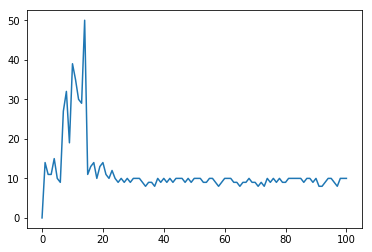

In [4]:
init = tf.global_variables_initializer()
steps = [0]

with tf.Session() as sess:
    D=[]
    sess.run(init)
    for i in range(100):
        state = env.reset()
        done = False
        step = 0
        r = 0
        print()
        print(state)
        while done == False:
            step+=1
            # agent do something new
            res_action, res_Q = sess.run([Qa, Q], feed_dict={_input:[state]})
            print(res_action, res_Q)
            if  np.random.rand(1) < beta:
                new_action = env.action_space.sample()
                res_action[0] = new_action
               
            
            # do action 
            new_state, reward, done, _ = env.step(res_action[0])
            
            if done:
                if step<200:
                    reward = -100
                else:
                    reward = 1
                if step>max(steps):
                    beta=beta*0.3
            else:
                reward = 0
            D.append( (state, res_action[0], reward , new_state, done, res_Q) )
            state = new_state

        steps.append(step)
        # update weight
        for s, a, r , sn, d, q in random.sample(D, min(64, len(D))):
            # cal reward
            qn = q.copy()
            if d:
                y = r
            else:
                next_Q = sess.run(Q, feed_dict={_input:[sn]})
                y = r + gamma*np.max(next_Q)
            qn[0, a] = y
            _, hQ, hQe = sess.run([trainer, Q, Qe], feed_dict={_input:[s], Qe:qn})
            q = hQ
    
        # play
        done = False
        state = env.reset()
        while not done:
            qa = sess.run([Qa], feed_dict={_input:[state]})
            state, reward, done, _ = env.step(qa[0][0])
            env.render()
        
plt.plot(steps)

In [5]:

# beta = 0.5
# init = tf.global_variables_initializer()
# steps = list()
# with tf.Session() as sess:
#     sess.run(init)
    
#     for episode in range(nepisode):
#         print()
#         # training: Collect play experience
#         memos = list()
#         done = False
#         while len(memos) < batch_legth*batch_iter:
#             done = False
#             state = env.reset()
#             while not done:
#                 rand_val = np.random.rand(1)
#                 res_action, res_Q = sess.run([Qa, Q], feed_dict={_input:[state]})
#                 new_state, reward, done, _ = env.step(res_action[0])
#                 memos.append( (state, res_action, reward, new_state, done) )
#         print("\tCollect Step in Experience: ", len(memos))
        
#         # training: Review playing experience
#         for iteration in range(batch_iter):
#             batch = sample(memos, batch_legth)
#             for state, res_action, reward, new_state, done in batch:
#                 r = reward
#                 if not done:
#                     next_Q = sess.run(Q, feed_dict={_input:[new_state]})
#                     r = r + gamma*np.max(next_Q)
#                 else:
#                     r = -100
#                 res_Q = sess.run(Q, feed_dict={_input:[state]})
#                 res_Q[0, res_action[0]] = r
#                 sess.run([trainer], feed_dict={_input:[state], Qe:res_Q})
            
                
    
#         # playing
#         state = env.reset()
#         step = 0
#         done = False
#         while not done:
#             env.render()
#             action = sess.run([Qa], feed_dict={_input:[state]})
#             action = action[0][0]
#             state, reward, done, _ = env.step(action)
#             step += 1
# #         print(step)
#         steps.append(step)
#         print("in Episode {} agent can live in {} step".format(episode, step))
# plt.plot(steps)
    


In [6]:
a = [[  8.58846959e-03  -9.89045802e-05]]
np.argmax(a)

0